# K-Nearest Neighbor

In [1]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt   

In [4]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_train = pd.read_csv('Datasets/data_train_v4.csv')
df_train = df_train.drop('Unnamed: 0', axis = 1)
indices_con_uno = df_train[df_train['nc_Holand-Netherlands'] == 1].index
df_train = df_train.drop(indices_con_uno)
df_train = df_train.drop('nc_Holand-Netherlands', axis = 1)
df_train

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,income,occ_Adm-clerical,occ_Armed-Forces,...,nc_Portugal,nc_Puerto-Rico,nc_Scotland,nc_South,nc_Taiwan,nc_Thailand,nc_Trinadad&Tobago,nc_United-States,nc_Vietnam,nc_Yugoslavia
0,44,296326,13,1,0,0,40,0,True,False,...,False,False,False,False,False,False,False,True,False,False
1,25,108542,10,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
2,26,97698,14,1,0,0,32,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,42,115178,13,0,0,0,15,0,False,False,...,False,False,False,False,False,False,False,True,False,False
4,59,146391,16,1,0,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,25,124111,9,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,True,False,False
9045,20,221095,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
9046,17,286960,7,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
9047,46,20534,13,1,0,0,45,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [5]:
# Con la biblioteca pandas para manejo de datos, se cargan los datos del dataset Iris a la variable df_iris
df_test = pd.read_csv('Datasets/data_test_v4.csv')
df_test = df_test.drop('Unnamed: 0', axis = 1)
df_test.head()

,age,fnlwgt,education_num,sex,capital_gain,capital_loss,hours_per_week,occ_Adm-clerical,occ_Armed-Forces,occ_Craft-repair,...,nc_Portugal,nc_Puerto-Rico,nc_Scotland,nc_South,nc_Taiwan,nc_Thailand,nc_Trinadad&Tobago,nc_United-States,nc_Vietnam,nc_Yugoslavia
0,24,182163,7,0,0,0,40,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,34,115040,9,1,0,0,44,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,26,261278,10,1,0,0,30,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,26,332008,10,1,0,0,37,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,25,40512,13,1,3674,0,30,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [58]:
x_cols = df_train.columns
x_data = df_train[x_cols[:-1]]
x_data

,Unnamed: 0,age,workclass,education.num,marital.status,race,sex,capital.gain,capital.loss,hours.per.week,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,0,44,0,13,0,1,1,0,0,40,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,25,0,10,1,1,1,0,0,40,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,26,1,14,0,1,1,0,0,32,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,42,1,13,0,1,0,0,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,59,1,16,1,1,1,0,0,50,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9044,9044,25,1,9,0,1,0,0,0,38,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9045,9045,20,1,9,0,0,1,0,0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9046,9046,17,1,7,0,1,1,0,0,40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9047,9047,46,0,13,0,1,1,0,0,45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [59]:
y_data = df_train[x_cols[-1]]
y_data

0       0
1       0
2       0
3       0
4       1
       ..
9044    0
9045    0
9046    0
9047    0
9048    0
Name: income, Length: 9049, dtype: int64

In [6]:
train_data, test_data = train_test_split(df_train, test_size=0.3, random_state=31)

In [7]:
x_train = train_data.drop('income', axis = 1)
y_train = train_data['income']

x_test = test_data.drop('income', axis = 1)
y_test = test_data['income']

In [8]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [9]:
# Creacion del modelo KNN
knn = KNeighborsClassifier()

# StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=31)
# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=skf, scoring='f1')

# Ajustar el modelo con GridSearchCV
grid_search.fit(x_train, y_train)

# Obtener los mejores parámetros y el mejor estimador
print("Mejores parámetros:", grid_search.best_params_)
best_knn = grid_search.best_estimator_

Mejores parámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


In [10]:
y_pred = best_knn.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81      2045
           1       0.40      0.34      0.37       670

    accuracy                           0.71      2715
   macro avg       0.60      0.59      0.59      2715
weighted avg       0.70      0.71      0.70      2715



In [12]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:",  accuracy)

Precisión: 0.7130755064456722


In [24]:
y_proba = best_knn.predict_proba(x_test)[:, 1]

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [26]:
auc = roc_auc_score(y_test, y_proba)

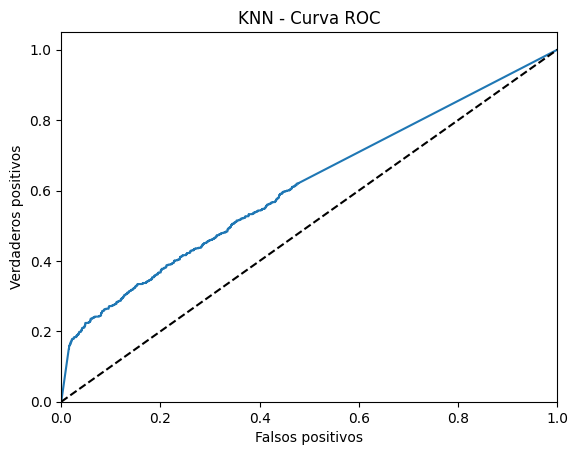

In [29]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos positivos')
plt.ylabel('Verdaderos positivos')
plt.title('KNN - Curva ROC')
plt.savefig("./Imagenes/roc_knn.eps", transparent=True, bbox_inches = 'tight') 
plt.show()

In [19]:
predict = best_knn.predict(df_test)

In [20]:
index = range(1, len(predict) + 1)

In [21]:
df_predict = pd.DataFrame(predict, index = index ,columns = ['income'])
df_predict

,income
1,0
2,0
3,0
4,0
5,0
...,...
21109,0
21110,0
21111,0
21112,0


In [22]:
df_predict.index.name = 'id'

In [23]:
df_predict.to_csv('knn_solution_0_1.csv')